# Hard-thresholding filtering

In [5]:
import numpy as np
from numpy import pi as pi
import scipy.signal as sg 
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
# from methods.method_delaunay_triangulation import instantiate_method
from methods.method_hard_threshold import hard_thresholding

In [6]:
# A test for new methods
np.random.seed(0) 

# signal parameters
SNRin = 30
N = 2**9
Nsub=N//2
sbank = SignalBank(N=N, Nsub= Nsub)
# s = sbank.signal_cos_chirp()
s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_cos_plus_tone()

# s = sbank.signal_mc_modulated_tones()
# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_synthetic_mixture_2()
# s = sbank.signal_mc_impulses()
signal, noise = add_snr(s,SNRin)
signal = s + noise*np.sqrt(N/Nsub) 

snr_out:30.0


In [7]:

Nfft = N
g,_ = get_round_window(Nfft)
S, stft, stft_padded, Npad = get_spectrogram(signal, window = g)
output_dict = hard_thresholding(signal, coeff=2.5, dict_output=True)
signals_output, mask = (i for i in output_dict.values())
print(10*np.log10((np.sum(s**2))/(np.sum((s-signals_output)**2))))

32.41465695996468


(257, 512)


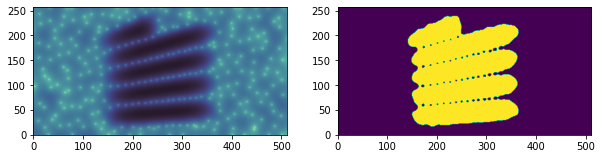

In [8]:
print(S.shape)
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
ax[1].imshow(mask, origin='lower')
# ax[1].plot(signals_output)
# ax[1].plot(s,'r--')
plt.show()
